
# Introduction

Dans cet exercice, j’ai utilisé un jeu de donnée issu de Persée. 
Dans le cadre du cours de méthodologie de projet du master Humanités numériques, j’ai utilisé la nouvelle plateforme de Persée http://data.persee.fr/ pour faire une requête sure le Sparql endpoint de la revue [Communication et Langage](http://www.persee.fr/collection/colan). J’ai pu récupérer un fichier. .csv de tous les titres des articles mis à disposition sur la plateforme (1969 à 2008). J’ai transformé celui-ci en .txt (en appliquant un encodage utf-8) que j’ai ensuite importé dans Jupyter. 

Le but de cet exercice est de mettre en application les techniques vues en cours de text-mining. Dans un premier temps, nous tenterons d’abord une analyse textuelle (1) afin de savoir quels sont les mots les plus utilisés sur ces titres. Puis nous tenterons de classifier ces derniers (2). 


# Méthodologie 

Nous utiliserons numpy/scikit learn et pandas pour la manipulation de nos données. Une des contraintes de ce dataset est l’absence de catégories préexistantes (sujets, thèmes ou catégories des articles). Un lowercasing et la suppression de caractères spéciaux sont appliqués sur le fichier texte (certes au prix d’une réduction de l’information). 

les caractéristiques des données textuelles sont : 
* Un fichier de 2470 lignes séparées par un retour chariot
* 140 703 caractères de longueur 
* les titres sont en français 


## 1 Analyse de données textuelles

In [119]:
### %matplotlib inline
import nltk
import nltk.corpus
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
with open(os.path.join("C://Users//henry//Desktop//TousLesTitresCL.txt")) as titres:
    titres = [line.strip() for line in titres.readlines()]
#Pour vérificication (structure, longueur et type)
#print(titres)
#len(titres)
#type(titres)



Je n’ai pas réussi à utiliser les stopwords français inclus dans nltk :
from nltk.corpus import stopwords
J’ai contourné cette difficulté en téléchargeant une liste [ici](https://github.com/stopwords-iso) que j’ai importée dans mon notebook sous forme de liste.

In [172]:

#pour l'étape suivante nous allons utiliser une liste de stopwords pour enlever de notre tfidfvectorizer les mots les plus courents                 
with open('C://Users//henry//Desktop//StopWordsFr.txt', 'r', encoding="utf-8") as StopWords:
   StopWords = [line.strip() for line in StopWords.readlines()]

Utilisation de countvectorizer afin de construire un vocabulaire du corpus et de prétraiter le texte (lowercasing, retrait des accents et suppression des stop words en français).

In [168]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer( encoding='utf-8', max_df=1, strip_accents='unicode',stop_words=StopWords)
vectorizer.fit(titres)
#vectorizer.vocabulary_ mis en commentaire pour plus de lisibilité
#nous avons maintenant un dictionnaire de features
vv= vectorizer.vocabulary_
type(vv)

dict

Une tentative de visualisation avec matplotlib (peu lisible et gourmande en RAM à cause de la quantité de mots) les temps de chargements m’ont dissuadé de recourir à d’autres visualisations. 

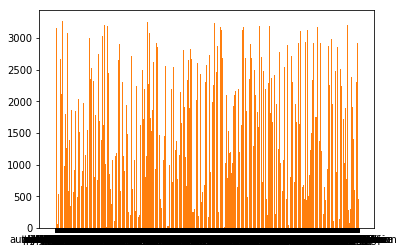

In [173]:
#Un tel type de visualisation est peu utile compte tenu du nombre de mots dans le dictionnaire. 
import matplotlib.pyplot as plt
plt.bar(range(len(vv)), list(vv.values()),)
plt.xticks(range(len(vv)), list(vv.keys()))
plt.show()

En complément de Count vectorizer, utilisation de TfidfVectorizer.
TFxIDF (term frequency-inverse document frequency) permet d’évaluer l’importance des mots dans ce corpus de titres. (plus le mot sera fréquent, plus son poids sera élevé). Les tableaux ci-dessous résument les occurrences de mots les plus présents dans les titres. Le champ lexical des sciences de l’information/communication (et quelques prénoms courants) est sans surprise très présent dans nos résultats. 

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=False, stop_words=StopWords)
tfidf_vectorizer.fit(titres)
#nous traitons le vocabulaire des titres
#tfidf_vectorizer.vocabulary_ 
#mis en commentaire pour plus de lisibilité
type(tfidf_vectorizer.vocabulary_)

dict

In [120]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
  # Ici je me suis efforcé de reprendre le code du TD sans toutefois le comprendre à 100%
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()
    ''' D[D < min_tfidf] = 0 '''
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

top_mean_feats(X_titres, features_titres)

,feature,tfidf
0,communication,0.018563
1,télévision,0.013515
2,livre,0.012311
3,lecture,0.011555
4,image,0.011225
5,presse,0.010560
6,information,0.008909
7,publicité,0.008902
8,jean,0.008033
9,médias,0.007421


In [89]:
#Affichage des mots les plus fréquents (selon TFxIDF) :
X_titres = tfidf_vectorizer.transform(titres)
features_titres = tfidf_vectorizer.get_feature_names()

D_tf = X_titres.toarray()
tf_sum = np.sum(D_tf, axis=0)
top_tfidf_feats(tf_sum, features_titres)

,feature,tfidf
0,communication,45.850167
1,télévision,33.383065
2,livre,30.409383
3,lecture,28.539759
4,image,27.726581
5,presse,26.082672
6,information,22.004753
7,publicité,21.989089
8,jean,19.840355
9,médias,18.329474


## 2 Classification de données textuelles
Utilisation du formalisme sac de mots pour déterminer la forme du corpus. 
On peut maintenant construire la matrice documents * termes : à l’aide de ce sac. Les titres des articles ne sont pas organisés en catégories nous ne pouvons pas appliquer d’apprentissage tel que la régression logistique utilisée dans le TD5. Pour déterminer quel algorithme appliquer, j’ai fait appel à [cette carte](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Pour ce type de données, le clustering semble plus indiqué : cela va permettre d’utiliser la distance euclidienne pour grouper les mots les plus proches les uns des autres dans notre corpus. 

In [155]:
#classification de données textuelles
lines_bag_of_words = vectorizer.transform(titres).toarray()
lines_bag_of_words.shape

(2470, 3339)

In [166]:

#http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
clustering = KMeans(n_clusters=8, init='k-means++', max_iter=1000, n_init=1)
clustering.fit(X_titres)
#nous souhaitons affichcher les clusters avec les termes les plus proches les uns des autres dans les titres
print("Termes les plus fréquents par clusters")
centroides = clustering.cluster_centers_.argsort()[:, ::-1]
termes = features_titres
for i in range(8):
    print("Cluster %d:" % i),
    for ind in centroides[i, :10]:
        print(' %s' % termes[ind]),
    print

Termes les plus fréquents par clusters
Cluster 0:
 livre
 presse
 image
 publicité
 information
 médias
 jean
 langage
 écriture
 art
Cluster 1:
 typographie
 nouvelle
 blanchard
 typographique
 foisonnante
 calligraphie
 sémiologie
 classification
 vers
 lisibilité
Cluster 2:
 communication
 entreprise
 sociologie
 langages
 scientifique
 information
 temps
 ans
 interne
 publicitaire
Cluster 3:
 édition
 monde
 schuwer
 philippe
 française
 livre
 dictionnaire
 pascal
 fouché
 balle
Cluster 4:
 lecture
 apprentissage
 rapide
 lire
 école
 expérience
 primaire
 précoce
 pédagogie
 chez
Cluster 5:
 journalisme
 emprise
 histoire
 pouvoir
 historien
 respect
 modernité
 profession
 investigation
 mutation
Cluster 6:
 images
 analyse
 œuvre
 contenu
 image
 travers
 art
 cinéma
 textes
 introduction
Cluster 7:
 télévision
 public
 jean
 histoire
 avenir
 enfants
 programmes
 publique
 française
 canadienne


array([[2646, 3582, 2216, ..., 4542,  902, 1701],
       [4558, 3151,  569, ..., 3273, 3274,    0],
       [ 977, 1581, 4223, ..., 3206, 3207,    0],
       ..., 
       [2453, 1550, 2124, ..., 3297, 3298,    0],
       [2218,  265, 4953, ..., 3251, 3252,    0],
       [4588, 3698, 2417, ..., 3236, 3237,    0]], dtype=int64)

J’ai également tenté d’appliquer une autre méthode avec un classifieur naïf de Bayes, ce qui n’a pas bien marché ce qui confirme que les techniques d’apprentissage supervisé sont peu adaptées à ce type de dataset. 

In [176]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(lines_bag_of_words, titres)
classifier.predict(titres[:100])
#classifier

ValueError: Expected 2D array, got 1D array instead:
array=['itc mendoza romane' 'la typographie  entre guillemets'
 'mademoiselle age tendre""' '...du coup de dés télématique'
 "4 calligraphes au service de la déclaration universelle des droits de l'homme calendrier édité par la revue non-violence actualité"
 '4 milliards de journaux, de f. archambault et j.-f. lemoine'
 '6 phrases, 200 sujets, 42 lapsus, 1 rêve'
 '20 ans de la revue en langage, linguistique et lisibilité'
 '20 ans de la revue en publicité et image' '20 ans de revue en mass média'
 '20 ans de revue en édition, communication...' '30/11/92'
 '200 mots à la minute : le débit oral des médias' '248 phrases de proust'
 "500 éditeurs, à l'heure de l'information"
 "1970-1995 : 25 ans de presse d'entreprise en france"
 '1972 : le symbole du livre'
 "a l'heure de l'inflation verbale : françois-bernard huygue la langue de coton"
 "a l'écoute des téléspectateurs : la permanence téléphonique de tf1"
 "a la recherche de l'impact d'une marque" 'a mi-chemin'
 'a mi-vie, de j.-l servan-schreiber'
 "a propos d'abraham moles. la communication : science ou idéologie ?"
 "a propos d'un concours pour photographes amateurs"
 "a propos d'un dictionnaire typographique"
 'a propos de la bourse hachette des chercheurs en communication'
 'a propos de la bourse hachette des chercheurs en communication (suite)'
 'a propos de la lecture' 'a propos de la signalisation dans le métro'
 "a propos de lecture. mais qu'est-ce que lire ?"
 'a propos des enfants sourds : la pensée sans langage'
 "a. m. cassandre ou l'autobiotypographe"
 'abraham moles théorie structurale de la communication et société'
 'académie prisma presse pour la presse magazine'
 'actes du colloque de cerisy (2004), la nuit en question(s)'
 'actes i et actes ii, de pierre bourdieu' 'actuel, journal'
 'adieu, les buttes-chaumont' 'adrian frutiger'
 'agnès felly vivre à paris, dictionnaire de la signalisation.'
 'aimer la vie, de j. cazeneuve'
 'alain berthelot et victor bouadjio écrire et être édité : guide pratique'
 'alain busson et yves evrard portraits économiques de la culture'
 "alain le diberder et nathalie coste-cerdan briser les chaînes, introduction a l'après télévision"
 "alain sayag et jean-claude lemagny l'invention d'un art. cent-cinquantième anniversaire de la photographie"
 'albert hollenstein, typographe visualiste'
 'albrecht dürer i proportions des lettres traduction de suzanne estève'
 'alessandrini : jeux typographiques'
 'alex : un code signalétique canadien' 'alice au pays des dollars'
 'allemagne-objet... objet de désir' "alphabets de l'impossible"
 'alphabétisation et rééducation de la lecture'
 "analyse d'une campagne danone"
 "analyse d'une œuvre par son auteur : ingmar bergman images"
 'analyse de contenu et rewriting journalistique'
 "analyse de contenu, de marie-christine d'unrug"
 "analyse de l'image fixe."
 "analyse de la crise : fabrice piault le livre, la fin d'un règne"
 "analyser l'activité du récepteur : le cas des previews"
 'andré de peretti organiser des formations'
 'andré rollin ils écrivent : où ? quand ? comment ?'
 'anges, mystère et confiture : michel serres la légende des anges'
 "anne machet si la mémoire m'était comptée, symbolique des nombres et mémoires artificielles de l'antiquité à nos jours"
 'anne sauvageot figures de la publicité, figures du monde'
 'anthropologie de la mort, de l.-v. thomas'
 "anthropologie et communication : théorie du lien rituel pascal lardellier, postface d'alain caillé"
 'anthropologie et glyphes'
 "apologie d'un zappeur compétent ou la télévision laisse tomber le masque !"
 "apport des sciences du langage en communication : le cas de la réunion d'informations en entreprise"
 "apprendre l'orthographe"
 "apprendre la lecture silencieuse à l'école primaire"
 'apprendre la parole. lecture communicationnelle de jacques rancière'
 'apprendre les langues étrangères à beaubourg'
 'apprendre à communiquer : j.a. malarewicz guide du voyageur perdu dans les dédales des relations humaines  ; b. sananès acquérir maîtrise, aisance et efficacité dans ses rapports avec les autres : la méthode  clere'
 'apprendre à lire aux adultes' 'apprendre à lire avant de savoir parler'
 "apprendre à lire avant l'école"
 'apprendre à lire avant six ans, de roger delogne'
 'apprendre à lire avec la sorcière du star princess'
 'apprenez les mathématiques à votre bébé, par g. doman'
 'apprentissage dans le cybermonde. jeux de miroirs et fantasmes de communication'
 'apprentissage et enseignement'
 'apprentissage et enseignement de la lecture'
 'après les autoroutes, le stationnement, etc., la ""communication"" payante ?'
 'arabisation et symbole collectif en algérie'
 "archéologie d'un escamotage : christian licoppe la formation de la pratique scientifique le discours d'expérience en france et en angleterre (1 630-1 820)"
 "archéologie de la fiction : isabelle rieusset-lemarié la société des clones à l'ère de la reproduction multimédia"
 'arguments linguistiques, de j.c. milner'
 "ariane levy-schoen et j.k. o' reagan le regard et la lecture"
 "ariette farge le goût de l'archive" 'armand mattelart la publicité'
 'art et communication marginale, de h. fischer' 'art et ordinateur'
 "aspects de mise en page des manuscrits de l'egypte pharaonique"
 'aspects of french eighteenth century typography, par john dreyfus'
 'aspects économiques du modèle editorial sur internet'
 'associations et communication persuasive : il faut se passer des agences-conseils !'
 'atlas poétique illustré : le livre de tous les pays, par g. jean et m.r. farré'
 'au cœur de la tribu : henri de camaret les gens de la télévision'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Conclusion
En conclusion, l’analyse par vectorisation et le clustering par Kmeans ont permis de bien identifier les thématiques de cette revue en mettant en avant des faits intéressants : plus de titres parlent de la télévision que de livres et de la presse par exemple. 
Le clustering permet d’identifier des termes proches les uns des autres ainsi que donner des pistes d’utilisation : le cluster 4 associant « lecture, apprentissage, rapide, lire, école, expérience, primaire, précoce, pédagogie, chez » montre bien la préoccupation et les centres d’intérêt des auteurs de cette revue.

Le cluster 5 souligne les enjeux et le champ lexical liés au thème du journalisme. 
J’ai beaucoup apprécié cette application pratique du cours, je regrette cependant la difficulté pour visualiser ce type de corpus, et le fait de ne pas avoir eu le temps de tester plus de méthodes issues du formidable outil qu’est sklearn. J’aurai également souhaité voir en quoi la bibliothèque nltk aurait pu proposer une approche différente. 
